In [4]:
!pip install google-play-scraper

In [5]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [6]:
#Scraping
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.zhiliaoapp.musically',
    lang='id',  # Scraping ulasan terhadap aplikasi Tiktok di Playstore
    country='id', # Setting bahasa menggunakan bahasa indonesia
    sort=Sort.MOST_RELEVANT, # Setting urutan berdasarkan ulasan paling relevan
    count=2000, # Jumlah ulasan yang saya gunakan adalah 2000
    filter_score_with=None # Filter score menggunakan none sehingga seluruh rating pada ulasan mulai bintang 1 sampai 5 akan digunakan
)

In [7]:
df_tiktok = pd.DataFrame(np.array(result),columns=['review'])
df_tiktok = df_tiktok.join(pd.DataFrame(df_tiktok.pop('review').tolist()))
df_tiktok.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,7379cad9-db3a-40fa-bb0c-6255d7bee435,Ayu Sfa,https://play-lh.googleusercontent.com/a-/ALV-U...,Enatah kenapa sekarang app tiktok gak bisa di ...,1,1879,31.1.4,2023-09-07 12:25:13,None,NaT,31.1.4
1,3185d562-fbe6-4b7a-bf7d-448e627c8ed7,Sahna Bt Dolak,https://play-lh.googleusercontent.com/a-/ALV-U...,Hi tik tok kenapa sy tidak bisa mengeluarkan n...,2,67,32.1.5,2023-11-19 12:33:32,None,NaT,32.1.5
2,978c4aa4-9b0b-4571-9e9a-566e0d1a20f9,IRHAM BIN ZAINUDIN,https://play-lh.googleusercontent.com/a-/ALV-U...,Makasih sudah memberikan aku aplikasi sanget b...,5,1299,31.3.4,2023-09-20 12:19:35,None,NaT,31.3.4
3,001f8284-8893-4fa1-984e-5bb6ebd853c1,Isabela 031,https://play-lh.googleusercontent.com/a/ACg8oc...,Bermanfaat jika di gunakan untuk hal yg baik a...,5,1050,31.1.4,2023-09-10 20:15:27,None,NaT,31.1.4
4,5ca46516-4aad-447c-96cb-7f1075a87359,Samuel Francisco Guterres,https://play-lh.googleusercontent.com/a/ACg8oc...,Akun saya tidak bisa live dan sekarang mau bik...,1,144,31.1.4,2023-09-03 14:54:12,None,NaT,31.1.4


In [8]:
# Urutkan data berdasarkan ulasan terbaru

df_tiktok2 = df_tiktok[['userName', 'score','at', 'content']]
sorted_df = df_tiktok2.sort_values(by='at', ascending=False)
sorted_df.head()

,userName,score,at,content
1,Sahna Bt Dolak,2,2023-11-19 12:33:32,Hi tik tok kenapa sy tidak bisa mengeluarkan n...
300,oyeik surur,4,2023-11-19 10:44:27,Aplikasi terbaik saat ini
101,Tasya Mentari,4,2023-11-18 18:47:37,Mudah mendapatkan ilmu agama yg baik dan benar
215,Mmh Dini,4,2023-11-18 09:50:03,Menghibur hati tiktok itu daripada gosip ngomk...
94,Yanti Fajri,4,2023-11-18 07:36:50,Sangat bagus dan puas 👍👍👍


In [9]:
# Hapus kolom username dan at karena tidak diperlukan
df_tiktok3=sorted_df[['content', 'score']]

In [10]:
print(df_tiktok3)

                                               content  score
1    Hi tik tok kenapa sy tidak bisa mengeluarkan n...      2
300                          Aplikasi terbaik saat ini      4
101     Mudah mendapatkan ilmu agama yg baik dan benar      4
215  Menghibur hati tiktok itu daripada gosip ngomk...      4
94                           Sangat bagus dan puas 👍👍👍      4
..                                                 ...    ...
798  Setelah di update kok jadi sering keluar sendi...      4
683  Kenapa kok jadi digabung,kan TIK TOK udah puny...      1
377  Saya kecewa bangett....kenapa setelah diperbar...      1
163  Tidak bisa di downloadd dan nama app tidak kel...      1
435  Knp musically sama kayak tiktok??ayo lah pleas...      1

[995 rows x 2 columns]


In [11]:
# Pelabelan dataset
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score == 3 :
    return 'Netral'
  elif score > 3 :
    return 'Positif'
df_tiktok3['Label'] = df_tiktok3 ['score'].apply(pelabelan)
df_tiktok3.head(50)

<ipython-input-11-19fd2dcf35d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tiktok3['Label'] = df_tiktok3 ['score'].apply(pelabelan)


,content,score,Label
1,Hi tik tok kenapa sy tidak bisa mengeluarkan n...,2,Negatif
300,Aplikasi terbaik saat ini,4,Positif
101,Mudah mendapatkan ilmu agama yg baik dan benar,4,Positif
215,Menghibur hati tiktok itu daripada gosip ngomk...,4,Positif
94,Sangat bagus dan puas 👍👍👍,4,Positif
135,Aplikasi sangat jelek,1,Negatif
51,"Akun saya di blokir, dan saya tidak tau kenapa...",5,Positif
98,Aplikasi ini sangat membantu saya kasi 5 Binta...,5,Positif
5,Terima kasih banyak atas hiburan nya ..ini apl...,5,Positif
100,Bagus tp kagak pernah dapat coin nol terus,5,Positif


In [12]:
# Export menjadi file berekstensi csv
df_tiktok3.to_excel("scrapping_tiktok.xlsx", index = False)

In [13]:
!pip install nltk
!pip install sastrawi
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 2.3 MB/s eta 0:00:00


In [14]:
import pandas as pd
import nltk
import re
import string
import emoji
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt');

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [15]:
# Inisialisasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [16]:
# Load data from Excel file
file_path = 'scrapping_tiktok.xlsx'
df_tiktok3 = pd.read_excel(file_path)

In [17]:
# Proses Cleaning Dataset

def remove_kata(comment):
  comment = comment.replace('\t', ' ').replace('\n', ' ').replace('\\u', ' ').replace('\\', '')
  comment = comment.encode('ascii', 'replace').decode('ascii')
  comment = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/S+)", " ", comment).split())
  return comment.replace("http://", " ").replace("https://", " ")

df_tiktok3['content'] = df_tiktok3['content'].apply(remove_kata)


def remove_angka(comment):
    return re.sub(r"\d+", " ", comment)

df_tiktok3['content'] = df_tiktok3['content'].apply(remove_angka)


def remove_punctuation(comment):
    return comment.translate(str.maketrans("", "", string.punctuation))

df_tiktok3['content'] = df_tiktok3['content'].apply(remove_punctuation)


def remove_whitespace_LT(comment):
    return comment.strip()

df_tiktok3['content'] = df_tiktok3['content'].apply(remove_whitespace_LT)


def remove_whitespace_multiple(comment):
    return re.sub('\s+', ' ', comment)

df_tiktok3['content'] = df_tiktok3['content'].apply(remove_whitespace_multiple)


def remove_single_char(comment):
    return re.sub(r"\b[a-zA-Z]\b", " ", comment)

df_tiktok3['content'] = df_tiktok3['content'].apply(remove_single_char)


print('Hasil Cleaning Dataset: \n')
print(df_tiktok3.head(80))

Hasil Cleaning Dataset: 

                                              content  score    Label
0   Hi tik tok kenapa sy tidak bisa mengeluarkan n...      2  Negatif
1                           Aplikasi terbaik saat ini      4  Positif
2      Mudah mendapatkan ilmu agama yg baik dan benar      4  Positif
3   Menghibur hati tiktok itu daripada gosip ngomk...      4  Positif
4                               Sangat bagus dan puas      4  Positif
..                                                ...    ...      ...
75  TikTok terlalu sering di update lama memori ra...      5  Positif
76  Gakada sebabtibatiktok tidak bisa   bukaaneh t...      1  Negatif
77                 Pengguna baru tiktok bagusss pisan      5  Positif
78  Kenapa tiktok ngak bisa di bukaka padahal jari...      1  Negatif
79                      Filternya gak ada yang muncul      4  Positif

[80 rows x 3 columns]


In [18]:
# Case Folding

import re
import pandas as pd
def casefolding(comment):
    comment = comment.lower()
    comment = comment.strip()
    return comment
df_tiktok3['content'] = df_tiktok3['content'].apply(casefolding)
print('Hasil Case Folding: \n')
print(df_tiktok3.head(80))

Hasil Case Folding: 

                                              content  score    Label
0   hi tik tok kenapa sy tidak bisa mengeluarkan n...      2  Negatif
1                           aplikasi terbaik saat ini      4  Positif
2      mudah mendapatkan ilmu agama yg baik dan benar      4  Positif
3   menghibur hati tiktok itu daripada gosip ngomk...      4  Positif
4                               sangat bagus dan puas      4  Positif
..                                                ...    ...      ...
75  tiktok terlalu sering di update lama memori ra...      5  Positif
76  gakada sebabtibatiktok tidak bisa   bukaaneh t...      1  Negatif
77                 pengguna baru tiktok bagusss pisan      5  Positif
78  kenapa tiktok ngak bisa di bukaka padahal jari...      1  Negatif
79                      filternya gak ada yang muncul      4  Positif

[80 rows x 3 columns]


In [19]:
df_tiktok3.to_excel('cleaning_tiktok.xlsx', index=False)

data_fold = pd.read_excel('cleaning_tiktok.xlsx')
print(data_fold.shape)
print(data_fold.head())

(995, 3)
                                             content  score    Label
0  hi tik tok kenapa sy tidak bisa mengeluarkan n...      2  Negatif
1                          aplikasi terbaik saat ini      4  Positif
2     mudah mendapatkan ilmu agama yg baik dan benar      4  Positif
3  menghibur hati tiktok itu daripada gosip ngomk...      4  Positif
4                              sangat bagus dan puas      4  Positif


In [20]:
import string
import re

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [21]:
# Proses Tokenizing

import nltk
nltk.download('punkt')

def word_tokenize_wrapper(comment):
  return word_tokenize(comment)

df_tiktok3['content'] = df_tiktok3['content'].apply(word_tokenize_wrapper)

print('Hasil Tokenizing: \n')
print(df_tiktok3.head(20))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Hasil Tokenizing: 

                                              content  score    Label
0   [hi, tik, tok, kenapa, sy, tidak, bisa, mengel...      2  Negatif
1                      [aplikasi, terbaik, saat, ini]      4  Positif
2   [mudah, mendapatkan, ilmu, agama, yg, baik, da...      4  Positif
3   [menghibur, hati, tiktok, itu, daripada, gosip...      4  Positif
4                          [sangat, bagus, dan, puas]      4  Positif
5                           [aplikasi, sangat, jelek]      1  Negatif
6   [akun, saya, di, blokir, dan, saya, tidak, tau...      5  Positif
7   [aplikasi, ini, sangat, membantu, saya, kasi, ...      5  Positif
8   [terima, kasih, banyak, atas, hiburan, nya, in...      5  Positif
9   [bagus, tp, kagak, pernah, dapat, coin, nol, t...      5  Positif
10  [susah, banget, bikin, video, susah, jg, buka,...      5  Positif
11  [aku, kasih, dulu, karena, fitur, epek, saat, ...      4  Positif
12                         [gk, tau, mau, nulis, apa]      5  Positif


In [22]:
df_tiktok3.to_excel('tokenizing_tiktok.xlsx', index=False)


data_token = pd.read_excel("tokenizing_tiktok.xlsx")
print(data_token.shape)
print(data_token.head())

(995, 3)
                                             content  score    Label
0  ['hi', 'tik', 'tok', 'kenapa', 'sy', 'tidak', ...      2  Negatif
1             ['aplikasi', 'terbaik', 'saat', 'ini']      4  Positif
2  ['mudah', 'mendapatkan', 'ilmu', 'agama', 'yg'...      4  Positif
3  ['menghibur', 'hati', 'tiktok', 'itu', 'daripa...      4  Positif
4                 ['sangat', 'bagus', 'dan', 'puas']      4  Positif


In [23]:
# Proses Filtering/Stopword Removal

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'anj', 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt', 'ku',
                       '&amp', 'yah', 'jgn', 'ga', 'ok', 'bgt', 'banget', 'jg',
                       'gw','guys','gtu','fyi','epek',
                       'iya','aja','sih','iyaa','tpi','udh','ga','ngga','nggak'
                       ,'yeeha','itu','ituu','tpi','giniii','kaan','pas',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nyesel', 'habis','download','iyaah',
                       'nanya','yaa','tcodtaf','ccq','google','yo','gada','gue','udah','blm','cakep','beneran','dah',
                       'sender','baru','lagi','maen','tbtb','woy','lagi','lg','lgi','njir','kocak','wkwk','naseh','nan',
                       'tcok','cok','nntn','sengaja','bru', 'ypadahal', 'cokk', 'utuk','untuk', 'kasih','sangatsangat','sanggat', 'the',
                       'mulu','jd','jdi','gk','oe'
                        ])

list_stopwords = set(list_stopwords)

def stopword_removal(comment):
    return [word for word in comment if word not in list_stopwords]

df_tiktok3['content'] = df_tiktok3['content'].apply(stopword_removal)
print('Hasil Filtering: \n')
print(df_tiktok3.head(50))

Hasil Filtering: 

                                              content  score    Label
0   [hi, tik, tok, sy, mengeluarkan, nomor, hp, ti...      2  Negatif
1                                 [aplikasi, terbaik]      4  Positif
2                                [mudah, ilmu, agama]      4  Positif
3   [menghibur, hati, tiktok, gosip, ngomkngin, or...      4  Positif
4                                       [bagus, puas]      4  Positif
5                                   [aplikasi, jelek]      1  Negatif
6   [akun, blokir, alasannya, mohon, tim, tiktok, ...      5  Positif
7                 [aplikasi, membantu, kasi, bintang]      5  Positif
8   [terima, hiburan, aplikasi, teman, hidupku, su...      5  Positif
9                       [bagus, tp, kagak, coin, nol]      5  Positif
10  [susah, video, susah, buka, filter, hp, jelek,...      5  Positif
11                                      [fitur, live]      4  Positif
12                                            [nulis]      5  Positif
1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
df_tiktok3.to_excel('stopword_tiktok.xlsx', index=False)

data_filter = pd.read_excel("stopword_tiktok.xlsx")
print(data_filter.shape)
print(data_filter.head())

(995, 3)
                                             content  score    Label
0  ['hi', 'tik', 'tok', 'sy', 'mengeluarkan', 'no...      2  Negatif
1                            ['aplikasi', 'terbaik']      4  Positif
2                         ['mudah', 'ilmu', 'agama']      4  Positif
3  ['menghibur', 'hati', 'tiktok', 'gosip', 'ngom...      4  Positif
4                                  ['bagus', 'puas']      4  Positif


In [25]:
# Proses Stemming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(document):
    return [stemmer.stem(term) for term in document]

df_tiktok3['content'] = df_tiktok3['content'].apply(stemming)
print(df_tiktok3['content'].head())

0    [hi, tik, tok, sy, keluar, nomor, hp, tik, tok...
1                                     [aplikasi, baik]
2                                 [mudah, ilmu, agama]
3       [hibur, hati, tiktok, gosip, ngomkngin, orang]
4                                        [bagus, puas]
Name: content, dtype: object


In [26]:
df_tiktok3.to_excel('Tiktok.xlsx', index=False)

data_fix = pd.read_excel("Tiktok.xlsx")
print(data_fix.shape)
print(data_fix.head())

(995, 3)
                                             content  score    Label
0  ['hi', 'tik', 'tok', 'sy', 'keluar', 'nomor', ...      2  Negatif
1                               ['aplikasi', 'baik']      4  Positif
2                         ['mudah', 'ilmu', 'agama']      4  Positif
3  ['hibur', 'hati', 'tiktok', 'gosip', 'ngomkngi...      4  Positif
4                                  ['bagus', 'puas']      4  Positif


In [27]:
# Proses TF-IDF

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

data_fix = pd.read_excel("Tiktok.xlsx")
data_fix = data_fix.astype({'Label': 'category', 'content': 'string', 'score': 'int'})

tf = TfidfVectorizer()

text_tf = tf.fit_transform(data_fix['content'].astype('U'))

result = pd.DataFrame(text_tf.toarray(), columns=tf.get_feature_names_out()).join(data_fix['Label'])

print(result)

     aamiin  abdet  abis  acak  account   ad  ada  adalngsng  adaxa  add  ...  \
0       0.0    0.0   0.0   0.0      0.0  0.0  0.0        0.0    0.0  0.0  ...   
1       0.0    0.0   0.0   0.0      0.0  0.0  0.0        0.0    0.0  0.0  ...   
2       0.0    0.0   0.0   0.0      0.0  0.0  0.0        0.0    0.0  0.0  ...   
3       0.0    0.0   0.0   0.0      0.0  0.0  0.0        0.0    0.0  0.0  ...   
4       0.0    0.0   0.0   0.0      0.0  0.0  0.0        0.0    0.0  0.0  ...   
..      ...    ...   ...   ...      ...  ...  ...        ...    ...  ...  ...   
990     0.0    0.0   0.0   0.0      0.0  0.0  0.0        0.0    0.0  0.0  ...   
991     0.0    0.0   0.0   0.0      0.0  0.0  0.0        0.0    0.0  0.0  ...   
992     0.0    0.0   0.0   0.0      0.0  0.0  0.0        0.0    0.0  0.0  ...   
993     0.0    0.0   0.0   0.0      0.0  0.0  0.0        0.0    0.0  0.0  ...   
994     0.0    0.0   0.0   0.0      0.0  0.0  0.0        0.0    0.0  0.0  ...   

     yuk  yukk   yy  yyy  y

In [28]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

# Membaca data dari file Excel
data_fix = pd.read_excel("Tiktok.xlsx")

# Memisahkan fitur dan label
X = data_fix['content']
y = data_fix['Label']

# Split data 70:30 untuk pembelajaran dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengubah teks menjadi vektor fitur
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Algoritma Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred_nb = nb.predict(X_test_vec)

# Algoritma Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)
y_pred_rf = rf.predict(X_test_vec)

# Mengukur kinerja Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

# Mengukur kinerja Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Menampilkan hasil kinerja Naive Bayes
print("Naive Bayes:")
print("Accuration (80:20):", accuracy_nb)
print("Presisi (80:20):", precision_nb)
print("Recall (80:20):", recall_nb)
print("F1 Score (80:20):", f1_nb)

# Menampilkan hasil kinerja Random Forest
print("\nRandom Forest:")
print("Accuration (80:20):", accuracy_rf)
print("Presisi (80:20):", precision_rf)
print("Recall (80:20):", recall_rf)
print("F1 Score (80:20):", f1_rf)


Naive Bayes:
Accuration (80:20): 0.6984924623115578
Presisi (80:20): 0.6182398162952264
Recall (80:20): 0.6984924623115578
F1 Score (80:20): 0.6522704700763134

Random Forest:
Accuration (80:20): 0.6582914572864321
Presisi (80:20): 0.6783773730772877
Recall (80:20): 0.6582914572864321
F1 Score (80:20): 0.60598089451744


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


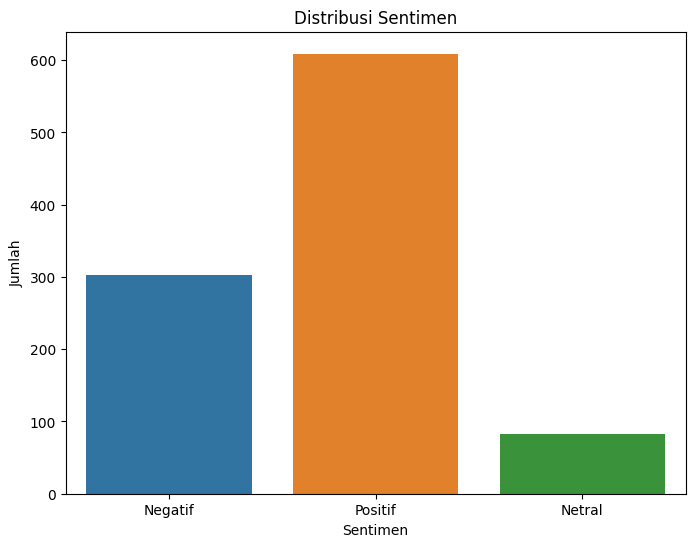

In [29]:
# Visualisasi distribusi sentimen
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=data_fix)
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()